In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Load the data
cust_demographics = pd.read_excel('C:/Users/lenovo/Desktop/py/ML Case study/credit consumption/CustomerDemographics.xlsx')
cust_behavior = pd.read_excel('C:/Users/lenovo/Desktop/py/ML Case study/credit consumption/CustomerBehaviorData.xlsx')
credit_consumption = pd.read_excel('C:/Users/lenovo/Desktop/py/ML Case study/credit consumption/CreditConsumptionData.xlsx')


In [4]:
cust_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [5]:
cust_demographics= cust_demographics.dropna()

In [6]:
cust_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [7]:
# clean data 
cust_behavior =cust_behavior.dropna()

In [8]:
credit_consumption = credit_consumption.dropna()

In [9]:
print(cust_demographics.isna().sum())
print(cust_behavior.isna().sum())
print(credit_consumption.isna().sum())


ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
dtype: int64
ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0

In [10]:
# Exploratory Data Analysis
cust_behavior.describe()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
count,19993.000000,19993.000000,19993.000000,1.999300e+04,19993.000000,19993.000000,19993.000000,19993.000000,19993.000000,19993.000000,...,1.999300e+04,19993.000000,19993.000000,1.999300e+04,1.999300e+04,1.999300e+04,19993.000000,19993.000000,1.999300e+04,1.999300e+04
mean,9998.735207,17860.433741,8130.287610,1.618871e+04,7702.306907,12137.668465,7110.658697,41.614965,33.567098,41.430351,...,8.293485e+04,11.920672,40.977592,5.821948e+04,7.810053e+04,7.882544e+04,19.908918,44.527985,5.284759e+04,1.540108e+04
std,5773.734659,25162.510531,14573.994247,2.651411e+04,17894.615873,18793.727254,13315.744100,97.849124,50.323937,46.630520,...,1.715039e+05,16.857829,40.562939,2.086269e+05,2.449259e+05,1.570094e+05,27.057923,35.079321,1.343334e+05,1.202720e+05
min,0.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,...,1.061000e+01,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00
25%,4998.000000,4377.000000,1624.650000,3.635910e+03,1634.260000,2999.075000,1361.100000,5.000000,8.000000,10.000000,...,2.520700e+04,2.000000,11.000000,2.020300e+04,2.576311e+04,2.492008e+04,4.000000,12.000000,1.896000e+04,1.545940e+03
50%,9999.000000,10218.985000,3964.750000,8.635230e+03,3793.590000,6656.800000,3326.000000,10.000000,23.000000,35.000000,...,4.812700e+04,4.000000,23.000000,3.150100e+04,4.571616e+04,4.618450e+04,7.000000,37.000000,3.025000e+04,3.934660e+03
75%,14998.000000,21196.000000,9339.020000,1.863800e+04,8263.590000,14200.910000,7458.820000,44.000000,43.000000,61.000000,...,9.442200e+04,11.000000,69.000000,5.642100e+04,8.527600e+04,8.602000e+04,21.000000,73.000000,5.344900e+04,9.376390e+03
max,19999.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.000000,653.000000,...,1.060175e+07,71.000000,171.000000,1.000000e+07,2.642915e+07,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06


In [11]:
cust_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19993 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     19993 non-null  int64  
 1   cc_cons_apr            19993 non-null  float64
 2   dc_cons_apr            19993 non-null  float64
 3   cc_cons_may            19993 non-null  float64
 4   dc_cons_may            19993 non-null  float64
 5   cc_cons_jun            19993 non-null  float64
 6   dc_cons_jun            19993 non-null  float64
 7   cc_count_apr           19993 non-null  float64
 8   cc_count_may           19993 non-null  int64  
 9   cc_count_jun           19993 non-null  int64  
 10  dc_count_apr           19993 non-null  int64  
 11  dc_count_may           19993 non-null  int64  
 12  dc_count_jun           19993 non-null  int64  
 13  card_lim               19993 non-null  int64  
 14  personal_loan_active   19993 non-null  int64  
 15  ve

In [12]:
cust_demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19993 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            19993 non-null  int64  
 1   account_type                  19993 non-null  object 
 2   gender                        19993 non-null  object 
 3   age                           19993 non-null  int64  
 4   Income                        19993 non-null  object 
 5   Emp_Tenure_Years              19993 non-null  float64
 6   Tenure_with_Bank              19993 non-null  int64  
 7   region_code                   19993 non-null  float64
 8   NetBanking_Flag               19993 non-null  int64  
 9   Avg_days_between_transaction  19993 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.7+ MB


In [13]:
print(cust_demographics.describe())

                 ID           age  Emp_Tenure_Years  Tenure_with_Bank  \
count  19993.000000  19993.000000      19993.000000      19993.000000   
mean    9999.393638     47.674736         15.216741          5.495623   
std     5773.491357     30.364041         20.483956          2.870521   
min        0.000000     25.000000          0.500000          1.000000   
25%     5000.000000     33.000000          5.100000          3.000000   
50%     9999.000000     40.000000          9.900000          6.000000   
75%    14998.000000     53.000000         18.000000          8.000000   
max    19999.000000    223.000000        203.000000         10.000000   

        region_code  NetBanking_Flag  Avg_days_between_transaction  
count  19993.000000     19993.000000                  19993.000000  
mean     598.987596         0.717901                     11.044666  
std      220.099029         0.450032                      5.480536  
min      123.000000         0.000000                      2.000000

In [14]:
print(credit_consumption.info())
print(credit_consumption.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       15000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 351.6 KB
None
                 ID        cc_cons
count  15000.000000   15000.000000
mean   10032.077067   55157.729867
std     5760.372343   97670.972252
min        1.000000       0.000000
25%     5060.500000    6768.000000
50%    10054.000000   13364.000000
75%    15015.250000   20105.750000
max    19998.000000  408382.000000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

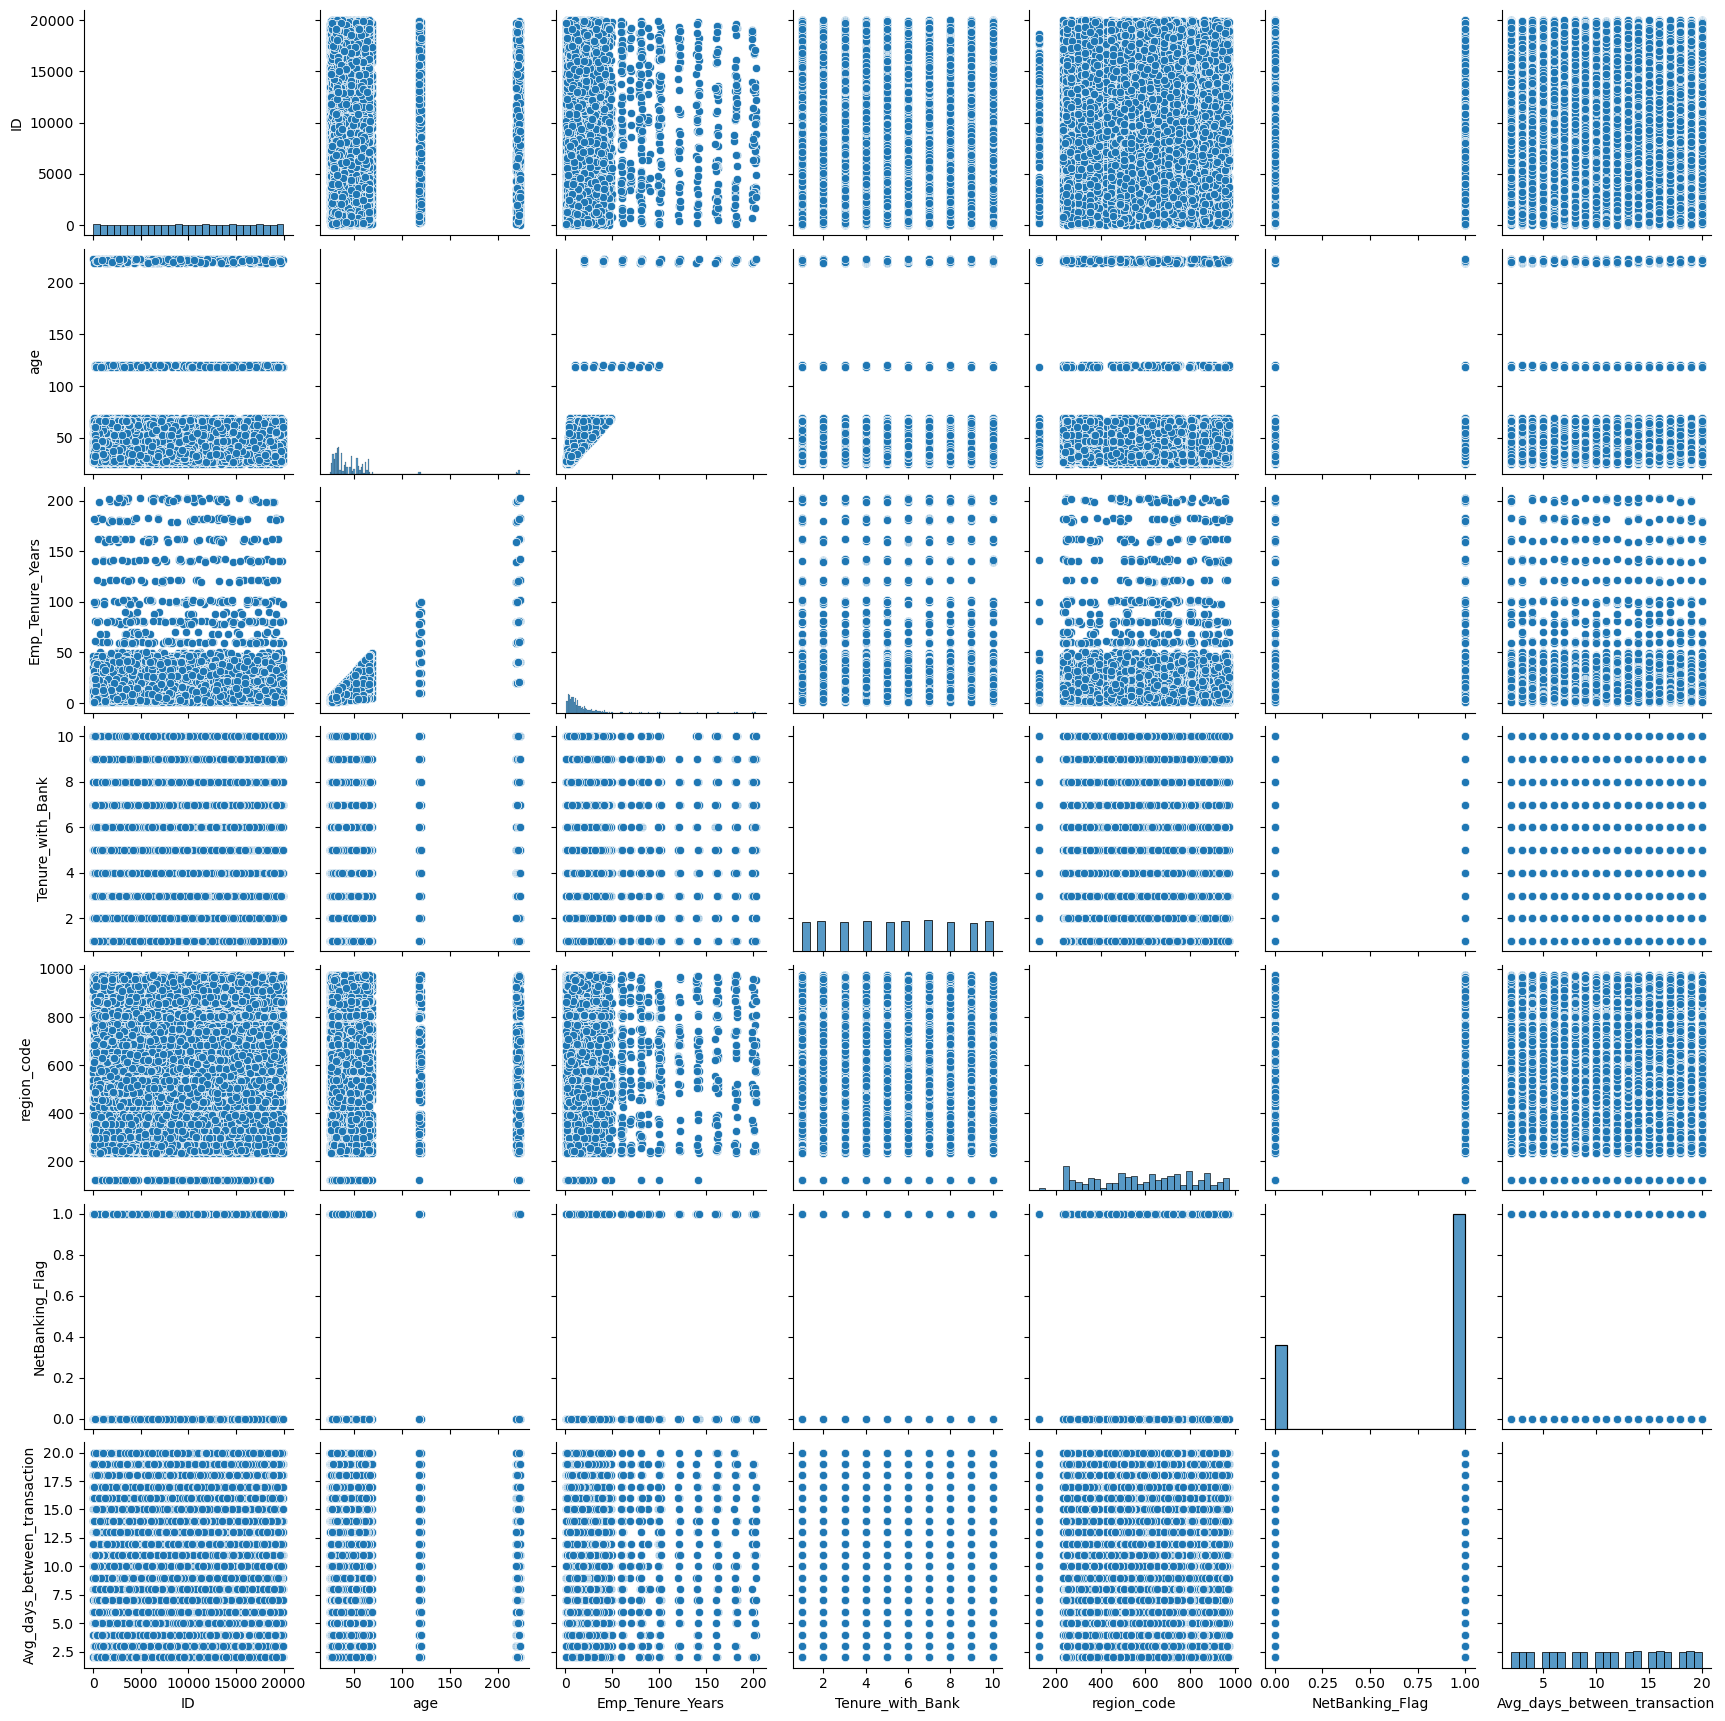

In [16]:
# Data Visualization
sns.pairplot(cust_demographics)

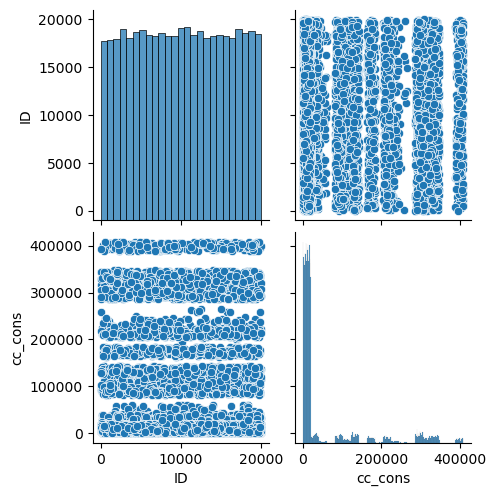

In [17]:
sns.pairplot(credit_consumption)

In [18]:
# Explore the target variable
print("Summary statistics of cc_cons:")
print(credit_consumption['cc_cons'].describe())


Summary statistics of cc_cons:
count     15000.000000
mean      55157.729867
std       97670.972252
min           0.000000
25%        6768.000000
50%       13364.000000
75%       20105.750000
max      408382.000000
Name: cc_cons, dtype: float64


In [19]:
# Merge the data on customer ID
df = cust_demographics.merge(cust_behavior, on='ID', how='inner')
df = df.merge(credit_consumption, on='ID', how='inner')

In [20]:
df.drop(['ID'], axis=1, inplace=True)

In [21]:
df.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,current,M,35,MEDIUM,15.0,1,708.0,0,17.0,24893.00,...,40,24563.0,30051.32,12761.0,2,65,50836.0,Y,1674.09,20014.0
1,current,M,35,HIGH,15.0,6,123.0,0,14.0,18941.62,...,78,23948.0,42119.05,76206.0,21,63,23226.0,Y,13043.34,10173.0
2,current,M,55,MEDIUM,24.5,1,802.0,1,3.0,5678.87,...,82,10752.0,58373.25,75283.0,7,1,27036.0,Y,25375.27,16095.0
3,current,F,29,MEDIUM,4.5,6,867.0,1,4.0,30489.50,...,38,12607.0,69851.51,68708.0,21,83,43037.0,Y,3544.33,7707.0
4,current,M,27,MEDIUM,4.9,3,958.0,1,11.0,2328.22,...,2,21440.0,52292.68,199925.5,2,35,17284.0,Y,5026.50,130263.0


In [22]:
# calculating the outliers

p0 = df.cc_cons.quantile(0)
p100 = df.cc_cons.quantile(1)

p25 = df.cc_cons.quantile(0.25)
p75 = df.cc_cons.quantile(0.75)

IQR = p75 - p25

lc = p25 - 1.5 * IQR
uc = p75 + 1.5 * IQR

print('min:', p0, '| lc:', lc, '| uc:', uc, '| max:', p100)

min: 0.0 | lc: -13234.5 | uc: 40105.5 | max: 408382.0


<AxesSubplot:>

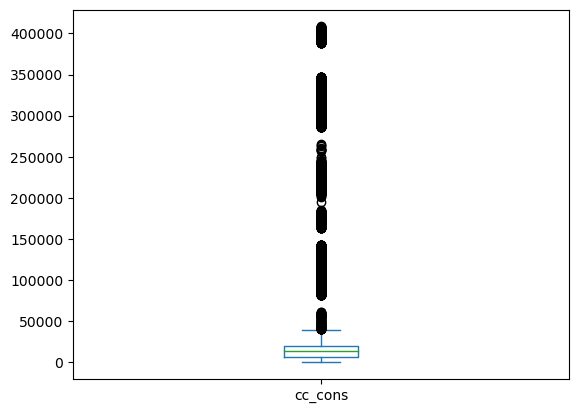

In [23]:
df.cc_cons.plot(kind = 'box')

In [24]:
df.cc_cons.clip( lower = lc, upper = uc, inplace=True )

<AxesSubplot:>

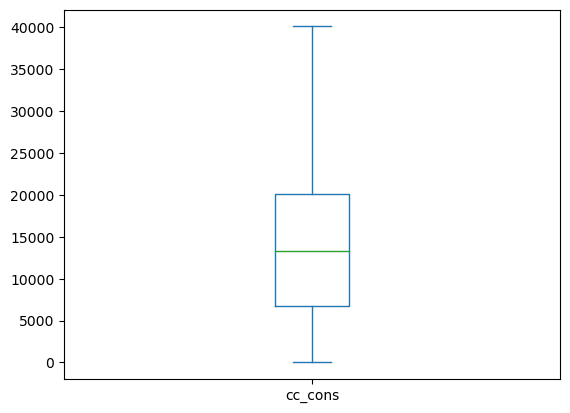

In [25]:
df.cc_cons.plot(kind = 'box')

In [26]:
df.describe()

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,1.499500e+04,14995.000000,...,14995.000000,14995.000000,1.499500e+04,1.499500e+04,1.499500e+04,14995.000000,14995.000000,1.499500e+04,1.499500e+04,14995.000000
mean,47.793331,15.185028,5.510770,598.410804,0.719507,11.048616,17960.830861,8171.498747,1.633869e+04,7702.797188,...,11.923975,41.002734,5.719908e+04,7.614838e+04,7.850636e+04,19.948716,44.641080,5.257960e+04,1.576286e+04,17045.716372
std,30.636617,20.315682,2.865848,220.071350,0.449255,5.492216,25191.316571,14775.132716,2.706498e+04,18988.978011,...,16.845632,40.541599,2.000517e+05,1.545265e+05,1.482193e+05,27.202607,35.088317,1.282713e+05,1.179348e+05,13399.755463
min,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,253.000000,19.350000,1.570000e+02,22.000000,...,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,4411.590000,1634.000000,3.638000e+03,1643.500000,...,2.000000,11.000000,2.008300e+04,2.572692e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.549350e+03,6768.000000
50%,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,10288.100000,3994.800000,8.694000e+03,3821.000000,...,4.000000,23.000000,3.140800e+04,4.580149e+04,4.590100e+04,7.000000,38.000000,3.042500e+04,3.953580e+03,13363.000000
75%,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000,21407.625000,9339.020000,1.895130e+04,8212.000000,...,11.000000,69.000000,5.598600e+04,8.443858e+04,8.559615e+04,21.000000,73.000000,5.320650e+04,9.376390e+03,20103.000000
max,223.000000,203.000000,10.000000,974.000000,1.000000,20.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,...,71.000000,171.000000,1.000000e+07,6.539810e+06,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06,40105.500000


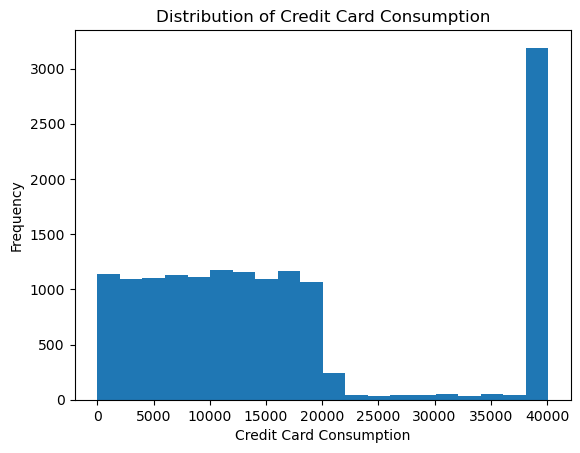

In [27]:
# Visualize the distribution of cc_cons
import matplotlib.pyplot as plt

plt.hist(df['cc_cons'], bins=20)
plt.xlabel('Credit Card Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Card Consumption')
plt.show()

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [29]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
df['account_type'] = label_encoder.fit_transform(df['account_type'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['Income'] = label_encoder.fit_transform(df['Income'])
df['NetBanking_Flag'] = label_encoder.fit_transform(df['NetBanking_Flag'])
df['loan_enq'] = label_encoder.fit_transform(df['loan_enq'])
df['age'] = label_encoder.fit_transform(df['age'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14995 entries, 0 to 14994
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   account_type                  14995 non-null  int32  
 1   gender                        14995 non-null  int32  
 2   age                           14995 non-null  int64  
 3   Income                        14995 non-null  int32  
 4   Emp_Tenure_Years              14995 non-null  float64
 5   Tenure_with_Bank              14995 non-null  int64  
 6   region_code                   14995 non-null  float64
 7   NetBanking_Flag               14995 non-null  int64  
 8   Avg_days_between_transaction  14995 non-null  float64
 9   cc_cons_apr                   14995 non-null  float64
 10  dc_cons_apr                   14995 non-null  float64
 11  cc_cons_may                   14995 non-null  float64
 12  dc_cons_may                   14995 non-null  float64
 13  c

In [31]:
# Assuming 'Account_type' is the column containing the problematic value
df['account_type'] = pd.to_numeric(df['account_type'], errors='coerce')

In [32]:
# Change data type to float64
df['cc_cons'] = df['cc_cons'].astype('float64')

In [33]:
from sklearn.model_selection import train_test_split
# Validate the model
X = df.drop('cc_cons', axis=1)
y = df['cc_cons']


In [34]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Train a random forest regressor
model = RandomForestRegressor(random_state=101)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [36]:
# Make predictions on the validation set
val_predictions = model.predict(X_val)

In [37]:
val_predictions

array([16513.285, 17844.81 , 18140.17 , ..., 18243.385, 16002.22 ,
       14812.385])

In [38]:
y_val

13410     7426.0
6472     40105.5
9967      2950.0
862      18590.0
5967     16357.0
          ...   
4217     40105.5
13385    19791.0
12742    18610.0
5688      2447.0
4872      6109.0
Name: cc_cons, Length: 4499, dtype: float64

In [39]:
import seaborn as sns

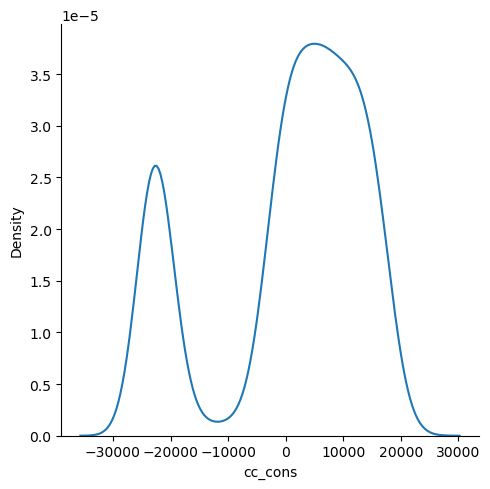

In [40]:
sns.displot(val_predictions-y_val,kind ='kde')

In [41]:
# Calculate root mean square percentage error (RMSPE)
rmspe = np.sqrt(np.mean(np.square((y_val - val_predictions) / y_val))) * 100
print("RMSPE on validation set:", rmspe)

RMSPE on validation set: 4081.365965300307


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score



In [43]:
# Create the Random Forest regressor
rf_model = RandomForestRegressor()



In [44]:
# Specify the features and target variable
X = df.drop('cc_cons', axis=1)
y = df['cc_cons']




In [49]:
# Perform cross-validation and obtain the predicted values
predicted = cross_val_predict(rf_model, X, y, cv=5)

print(predicted)

[17552.385 19242.775 15264.205 ... 14640.995 18880.785 17301.655]


In [50]:
# Calculate the R-squared score
r2 = r2_score(y, predicted)
print("R-squared:", r2)

R-squared: -0.022835068654228685


In [51]:
import seaborn as sns

In [52]:
predicted_file=pd.read_csv('predicted_values.csv')

In [53]:
predicted_file['Predicted_cc_cons']

0       53544.87
1       42837.78
2       63603.60
3       39886.12
4       45426.99
          ...   
4995    54260.71
4996    66215.97
4997    69948.30
4998    60473.73
4999    52542.05
Name: Predicted_cc_cons, Length: 5000, dtype: float64

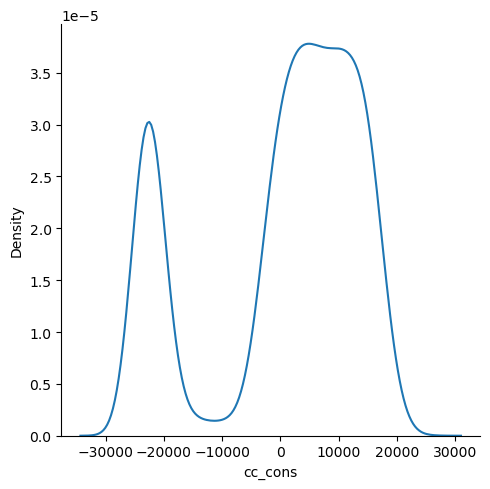

In [55]:
sns.displot(predicted-y,kind='kde')